# import the required libraries

In [172]:


import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics


# read the provided data tab as csv

In [173]:

warnings.filterwarnings("ignore")
df = pd.read_csv('poa.csv')


# Transform the data types to relevent formats for easier manipulation
df['Transaction'] = pd.to_datetime(df['Transaction'])

print(df.columns)
print(df.dtypes)





Index(['uid', 'Transaction', 'amount'], dtype='object')
uid                     int64
Transaction    datetime64[ns]
amount                  int64
dtype: object



## 1. Calculate the average payment delay per customer and show your workings.


In [174]:

warnings.filterwarnings("ignore")

df1 = []

for name, group in df.groupby(['uid']):
    group['pay_lag'] = group['Transaction'].shift(1)
    group['delay'] = ((group['Transaction'] - group['pay_lag']).dt.days)-7
    df1.append(group)

df1 = pd.concat(df1, ignore_index = True)
df1.groupby(['uid'])['uid','delay'].mean

d1 = df1.groupby(['uid'],as_index=False)['delay'].mean()

# This output is written to csv could as well be written to gs
d1.to_csv('avg pay delay per customer.csv')

d1

,uid,delay
0,1432,0.952381
1,3105,0.739130
2,4626,1.750000
3,10134,16.142857
4,11013,2.052632
...,...,...
112,62665,0.461538
113,62864,5.000000
114,63110,0.000000
115,63138,2.000000


## 2. Calculate the average payment delay for  the entire group and show your workings.


In [175]:

group_avg = d1['delay'].mean()
print('{} days on average'.format(round(group_avg,2)))

4.06 days on average


## 3. Forecast the total revenue the company would receive in the month of Jan 2022 and show your workings


In [177]:

df['monthly_transaction'] = df['Transaction'].dt.strftime('%Y-%m')
df3 = df.groupby(['monthly_transaction'], as_index=False).amount.sum()
df3.to_csv('monthly_amounts.csv')

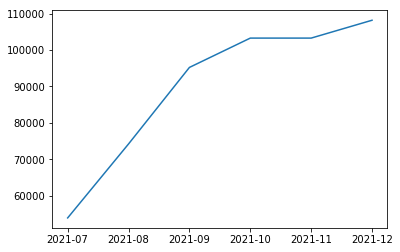

In [178]:
%matplotlib inline
plt.plot(df3.monthly_transaction, df3.amount)
plt.show()


# Perform the projection aspect

## 4. What is the average revenue per subscribed customer per month, show your workings.


In [179]:


df4 = df.groupby(['uid','monthly_transaction'], as_index=False).amount.sum()
df4 = df4.groupby(['uid'],as_index=False).amount.mean().round(2)
df4.head(5)
#df4.to_csv('average subscriber revenue per month.csv')

,uid,amount
0,1432,1283.33
1,3105,1400.00
2,4626,1050.00
3,10134,560.00
4,11013,1166.67


## 5. Based on your findings, what would be your recommendation about the 7-day subscription be? State any assumptions used in making this recommendation.

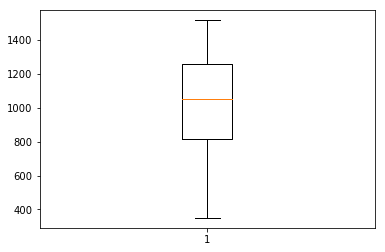

In [180]:
plt.boxplot(df4.amount)
plt.show()

##  6. What other insights/analysis can you extract from this data set?

It would be intresting to look at:

* Demographics of users who delay the most in terms of location gender source of income

* Internet performance for the delaying groups vs the low delay group

* Get reviews of the product for the two emerging groups and perform both text and numeric analysis

